In [1]:
import numpy as np

## 同時確率分布

ある薬の治験に 40 人が集まり各データ

|  |A型|B型|O型|AB型|合計|
|--|--|--|--|--|--|
|男性|10|4|4|2|20|
|女性|8|2|8|2|20|

で発生確率は人数的に確率はこんな感じ

|  |A型|B型|O型|AB型|合計|
|--|--|--|--|--|--|
|男性|0.25|0.1|0.1|0.05|0.5|
|女性|0.2|0.05|0.2|0.05|0.5|
|計|0.45|0.15|0.3|0.1|1|

で、血液型 X 性別 Y としたときにそれぞれが特定の値を取るときの確率を表したものを「同時確率分布」と言う。
血液型が $x_i$ , 性別が $y_j$ を取るときの確率を表す関数を同時確率関数という。

$$
P(X=x_i, Y=y_j) = p_{X,Y} (x_i, y_j)
$$

例えば、A 型かつ男性 $P(X=x_1, Y=y_1) = 0.25$ と取得できる。  
また、 $x_i$ の時(または $y_j$ )固定の時の確率分布を「周辺確率分布」といい

$$
p_x(x_i) = \sum_j P(X=x_i, Y=y_j) = P(X=x_i)
$$

てな感じで周辺確率関数を定義できる。  
仮に、A型と割り切って( $x_i$ ) $\sum_j P(X=x_i, Y=y_j)$ を考えると、 $Y$ は性別なので、男性女性の合計なので、合計確率 $0.45$ と。

## 条件付き確率関数

$X = x_i$ を与えたときの $Y = y_i$ である確率（条件付き確率関数）を

$$
P_{Y|X} (y_j | x_i) = P(Y=y_j | X=x_i) = \frac{P_{X,Y} (x_i, y_j)}{ p_x (x_i) }
$$

と記述する。

## 条件付き期待値

前述の条件付き確率関数に、期待値を取ったもの。  
$X=x_i$ を与えたときの $Y$ の **条件付き期待値** を

$$
E[Y|X=x_i] = \sum^\infty_{j=1} y_j p_{Y|X} (y_j | x_i) \\
= \frac{ \sum^\infty_{j=1}y_j p_{X,Y} (x_i, y_j) }{ p_x(x_i) }
$$

## 独立の定義と連続分布

2変数における独立の定義は全ての $x_i$ と $y_j$ で以下が成立すること

$$
p_{X,Y} (x_i, y_j) = p_X (x_i) p_Y (y_j)
$$

In [2]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x,y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2,))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [3]:
print(x.shape)
x

(45, 45)


array([[10, 10, 10, ..., 10, 10, 10],
       [12, 12, 12, ..., 12, 12, 12],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [94, 94, 94, ..., 94, 94, 94],
       [96, 96, 96, ..., 96, 96, 96],
       [98, 98, 98, ..., 98, 98, 98]])

In [4]:
print(y.shape)
y

(45, 45)


array([[10, 12, 14, ..., 94, 96, 98],
       [10, 12, 14, ..., 94, 96, 98],
       [10, 12, 14, ..., 94, 96, 98],
       ...,
       [10, 12, 14, ..., 94, 96, 98],
       [10, 12, 14, ..., 94, 96, 98],
       [10, 12, 14, ..., 94, 96, 98]])

In [5]:
print(pos.shape)
pos

(45, 45, 2)


array([[[10., 10.],
        [10., 12.],
        [10., 14.],
        ...,
        [10., 94.],
        [10., 96.],
        [10., 98.]],

       [[12., 10.],
        [12., 12.],
        [12., 14.],
        ...,
        [12., 94.],
        [12., 96.],
        [12., 98.]],

       [[14., 10.],
        [14., 12.],
        [14., 14.],
        ...,
        [14., 94.],
        [14., 96.],
        [14., 98.]],

       ...,

       [[94., 10.],
        [94., 12.],
        [94., 14.],
        ...,
        [94., 94.],
        [94., 96.],
        [94., 98.]],

       [[96., 10.],
        [96., 12.],
        [96., 14.],
        ...,
        [96., 94.],
        [96., 96.],
        [96., 98.]],

       [[98., 10.],
        [98., 12.],
        [98., 14.],
        ...,
        [98., 94.],
        [98., 96.],
        [98., 98.]]])

In [6]:
## 多次元正規分布
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])
z = rv.pdf(pos)

print(z.shape)
z

(45, 45)


array([[1.79105293e-10, 3.90713230e-10, 8.18909735e-10, ...,
        3.33805656e-11, 1.35715252e-11, 5.30141552e-12],
       [3.90713230e-10, 8.52330075e-10, 1.78642887e-09, ...,
        7.28187781e-11, 2.96059059e-11, 1.15648909e-11],
       [8.18909735e-10, 1.78642887e-09, 3.74423972e-09, ...,
        1.52623463e-10, 6.20520695e-11, 2.42392656e-11],
       ...,
       [3.33805656e-11, 7.28187781e-11, 1.52623463e-10, ...,
        6.22126874e-12, 2.52937912e-12, 9.88045888e-13],
       [1.35715252e-11, 2.96059059e-11, 6.20520695e-11, ...,
        2.52937912e-12, 1.02836881e-12, 4.01709481e-13],
       [5.30141552e-12, 1.15648909e-11, 2.42392656e-11, ...,
        9.88045888e-13, 4.01709481e-13, 1.56918905e-13]])

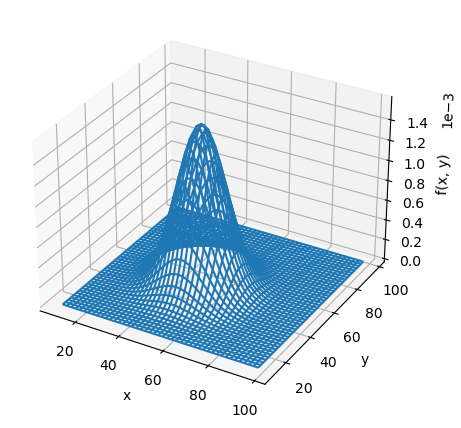

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)
ax = Axes3D(fig)

ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))